### Investigate DocVec embeddings dist with respect to the class labels

In [39]:
!pip uninstall umap -q 
!pip install umap-learn --index-url https://pypi.python.org/pypi -q

Proceed (Y/n)? ^C
ERROR: Operation cancelled by user

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [52]:
!pip install "notebook>=5.3" "ipywidgets>=7.2" --index-url https://pypi.python.org/pypi -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [18]:
!pip install plotly --index-url https://pypi.python.org/pypi -q


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import plotly.express as px
import umap.umap_ as umap

from sklearn.manifold import TSNE
from wordcloud import WordCloud


import warnings
warnings.filterwarnings('ignore')

In [23]:
df_labels = pd.read_csv("../data/labels.csv", index_col=0)
df_doc_vec = pd.read_csv("../doc2vec/doc_vectors.csv", index_col=0)
# df = df_labels.join(df_doc_vec)

In [24]:
np.all(df_labels.index == df_doc_vec.index)

True

In [26]:
df_labels = df_labels.loc[df_doc_vec.index]

In [27]:
RS = 42

In [28]:
X_embedded_tsne = TSNE(n_components=2, random_state=RS).fit_transform(df_doc_vec.values)
X_embedded_umap = umap.UMAP(n_components=2, random_state=RS).fit_transform(df_doc_vec.values)

In [29]:
# TSNE first

In [30]:
df = df_labels.copy()

In [35]:
df["x_component"] = X_embedded_tsne[:, 0]
df["y_component"] = X_embedded_tsne[:, 1]

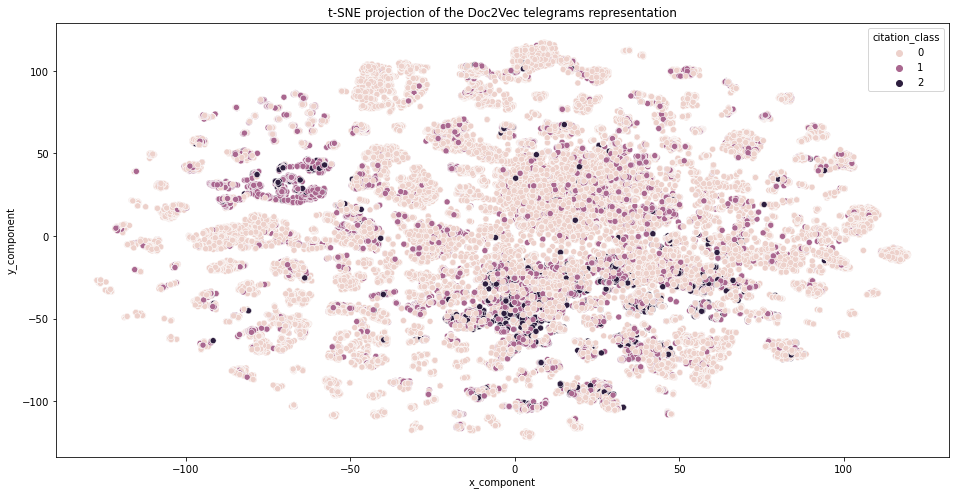

In [36]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.scatterplot(data=df, x="x_component", y="y_component", hue='citation_class')
plt.title("t-SNE projection of the Doc2Vec telegrams representation")
plt.show()

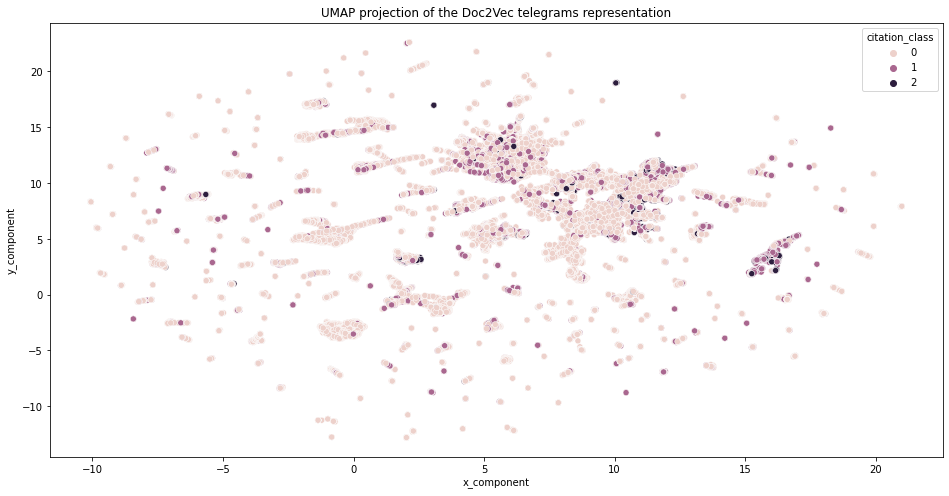

In [37]:
# UMAP
df = df_labels.copy()
df["x_component"] = X_embedded_umap[:, 0]
df["y_component"] = X_embedded_umap[:, 1]

plt.rcParams["figure.figsize"] = (16, 8)
sns.scatterplot(data=df, x="x_component", y="y_component", hue='citation_class')
plt.title("UMAP projection of the Doc2Vec telegrams representation")
plt.show()

### Look closer at interesting cluster

In [53]:
df_x = df[df.x_component>14.5][df.x_component<17]

In [54]:
df_y = df_x[df_x.y_component<8][df_x.y_component>-2]

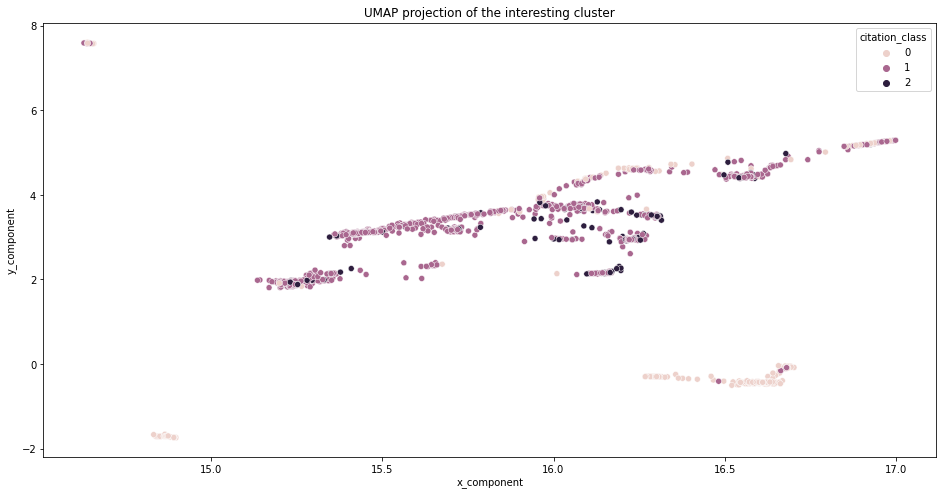

In [56]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.scatterplot(data=df_y, x="x_component", y="y_component", hue='citation_class')
plt.title("UMAP projection of the interesting cluster")
plt.show()

In [58]:
df_data = pd.read_csv("../data/assembled.csv", index_col=0)

In [59]:
df_data = df_data.loc[df_y.index]

In [69]:
df_data['from'].value_counts()

palmer@lanl.gov                 460
scott@milkyway.gsfc.nasa.gov    235
pae9@leicester.ac.uk            189
scott@lheamail.gsfc.nasa.gov     89
klp5@leicester.ac.uk             61
                               ... 
sro@mssl.ucl.ac.uk                1
cwolf@astro.psu.edu               1
hoversten@astro.psu.edu           1
stratta@asdc.asi.it               1
stroh@astroh.org                  1
Name: from, Length: 72, dtype: int64

In [72]:
# all of them are from GCN

len([v for v in df_data.index.values if v.endswith("gcn")])  

1356

In [104]:
# 75% obs are made with Swift
len([v for v in df_data.subject.values if "Swift" in v])/len(df_data)

0.9660766961651918

In [102]:
df_data.subject.value_counts()[:15]

GRB 090313: Swift detection of a burst                                 2
GRB 110318B: Swift detection of a burst                                2
GRB 110407A: Swift detection of a burst                                2
GRB 101023A: Swift detection of a burst                                2
SGR 1E 1841-045: Swift detection of a soft gamma repeater burst        2
Trigger 421695: Swift detection of a possible burst                    2
GRB 121027A: Swift detection of a burst                                2
GRB 180222A: Swift detection of a burst                                1
GRB 180314A: Swift detection of a burst with an optical counterpart    1
GRB 180314B: Swift detection of a burst                                1
GRB 180311A: Swift-XRT refined Analysis                                1
GRB 180311A: Swift detection of a burst                                1
GRB 180224A: Swift detection of a burst with an optical counterpart    1
GRB 180204A: Swift detection of a short burst      

In [103]:
# 93% are related to the GRB
len([v for v in df_data.subject.values if "GRB" in v])/len(df_data)

0.9373156342182891

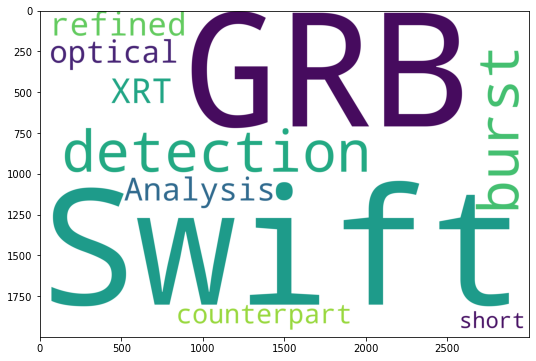

In [105]:
wordcloud = WordCloud(max_words=10, width = 3000, height = 2000, random_state=RS, background_color='white', collocations=False)\
    .generate(' '.join(df_data.subject))
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud) 
# plt.title(f"Most common words in interesting cluster subjects", fontsize=20)
plt.show()

In [107]:
df_data.join(df_labels).n_cited.mean()

6.441002949852507

In [109]:
(460 +  235 + 189 + 89)/len(df_data)

0.717551622418879